# Project 1

In [8]:
# data manipulation
import numpy as np
import pandas as pd
import geopandas as gpd

# visualization
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties
from highlight_text import fig_text, ax_text
from matplotlib.patches import FancyArrowPatch

# geospatial manipulation
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geoplot
import geoplot.crs as gcrs

In [21]:
df = pd.read_csv("./weather.csv")
df.head()

city        lat         lon month  monthnum  sunshine  rain
0  San Diego  32.715736 -117.161087   Jan         1       217  1.53
1  San Diego  32.715736 -117.161087   Feb         2       255  0.15
2  San Diego  32.715736 -117.161087   Mar         3       234  0.57
3  San Diego  32.715736 -117.161087   Apr         4       236  1.01
4  San Diego  32.715736 -117.161087   May         5       277  0.02

In [22]:
grouped_df = df.groupby(['city', 'lat', 'lon'], as_index=False)['rain'].sum()
grouped_df

city        lat         lon   rain
0        Chicago  41.878113  -87.629799  33.20
1        Houston  29.760427  -95.369804  49.58
2          Miami  25.761681  -80.191788  61.90
3  New York City  40.712776  -74.005974  46.23
4      San Diego  32.715736 -117.161087  10.34
5  San Francisco  37.774929 -122.419418  23.66

In [43]:
proj = ccrs.Mercator()

url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/all_world.geojson"
world = gpd.read_file(url)
world = world[~world['name'].isin(["United States"])]
world = world.to_crs(proj.proj4_init)
world = world[world['name'] == "United States of America"]
world

name                                           geometry
4  United States of America  MULTIPOLYGON (((-13674486.249 6242596.000, -13...

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import cartopy.crs as ccrs
from cartopy.io import shapereader
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Colors and Fonts
background_color = '#14213d'
map_color = (233/255, 196/255, 106/255, 0.2)
text_color = 'black'
bubble_color = '#fefae0'
alpha_text = 0.7

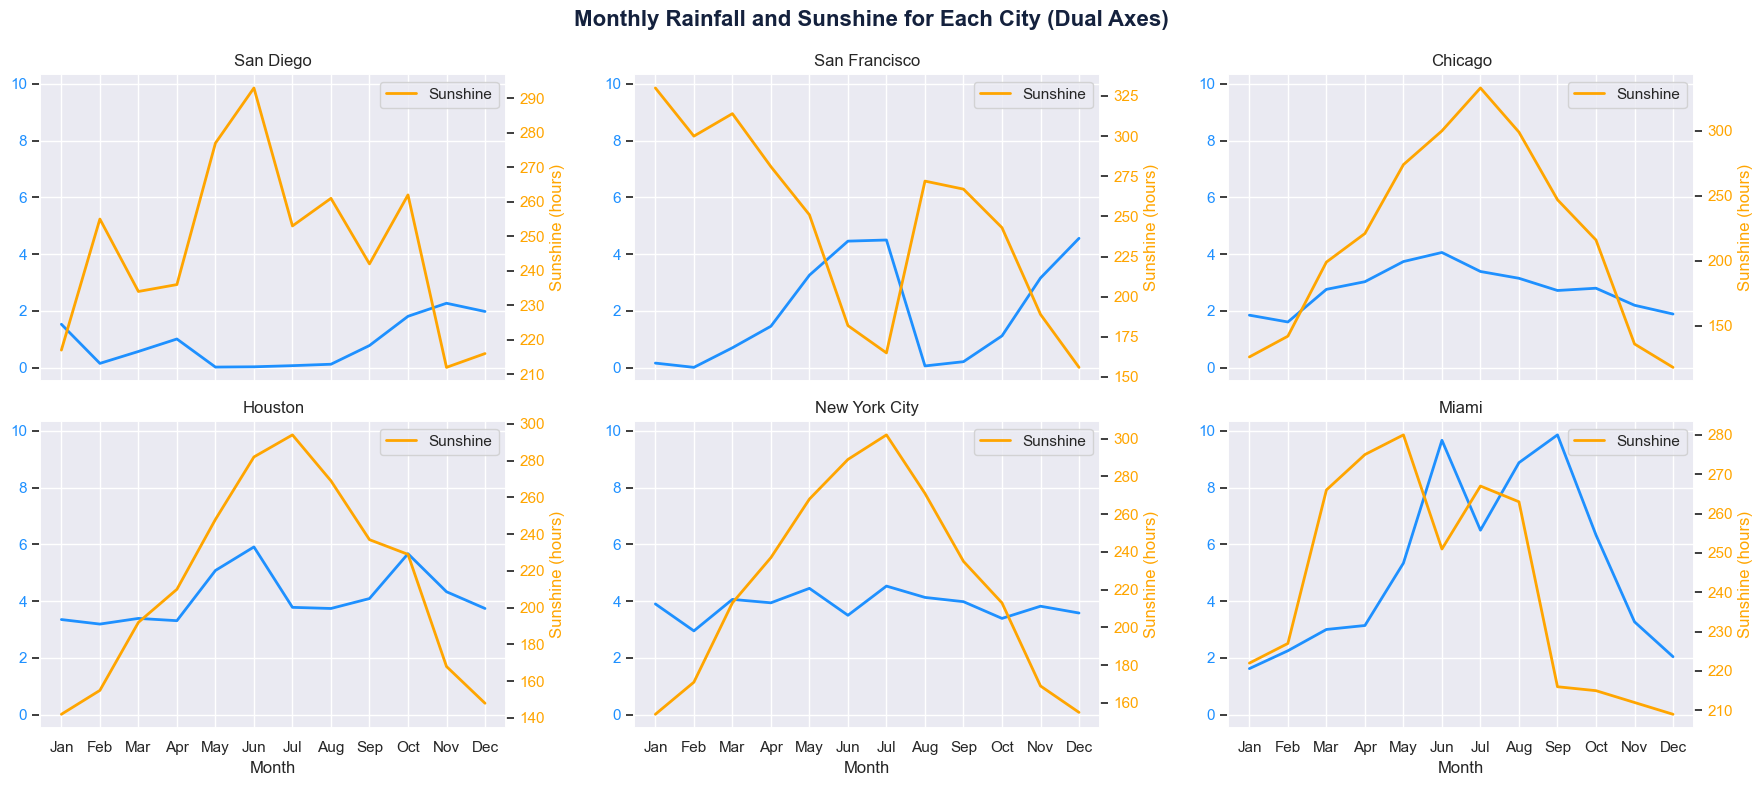

In [40]:
sns.set_theme(style="darkgrid", palette="husl")

# Create a FacetGrid for each city
g = sns.FacetGrid(
    df,
    col="city",
    col_wrap=3,
    height=4,
    aspect=1.5,
    margin_titles=True,
    despine=False,
)

# Custom function to plot rain and sunshine with dual axes
def plot_dual_axes(data, color, **kwargs):
    ax = plt.gca()  # Get the current axes
    ax2 = ax.twinx()  # Create a second y-axis sharing the same x-axis
    
    # Plot rain on the left axis
    sns.lineplot(
        data=data,
        x="month",
        y="rain",
        ax=ax,
        color="dodgerblue",
        linewidth=2,
        label="Rainfall",
        **kwargs,
    )
    ax.set_ylabel("Rainfall (mm)", color="dodgerblue")
    ax.tick_params(axis='y', labelcolor="dodgerblue")
    
    # Plot sunshine on the right axis
    sns.lineplot(
        data=data,
        x="month",
        y="sunshine",
        ax=ax2,
        color="orange",
        linewidth=2,
        label="Sunshine",
        **kwargs,
    )
    ax2.set_ylabel("Sunshine (hours)", color="orange")
    ax2.tick_params(axis='y', labelcolor="orange")
    
    # Adjust gridlines for better visualization
    ax2.grid(False)  # Disable the grid for the second axis

# Apply the custom plot function to each FacetGrid subplot
g.map_dataframe(plot_dual_axes)

# Add labels, legend, and adjust layout
g.set_axis_labels("Month", "")
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle(
    "Monthly Rainfall and Sunshine for Each City (Dual Axes)",
    fontsize=16,
    color="#14213d",
    fontweight="bold",
)

plt.show()


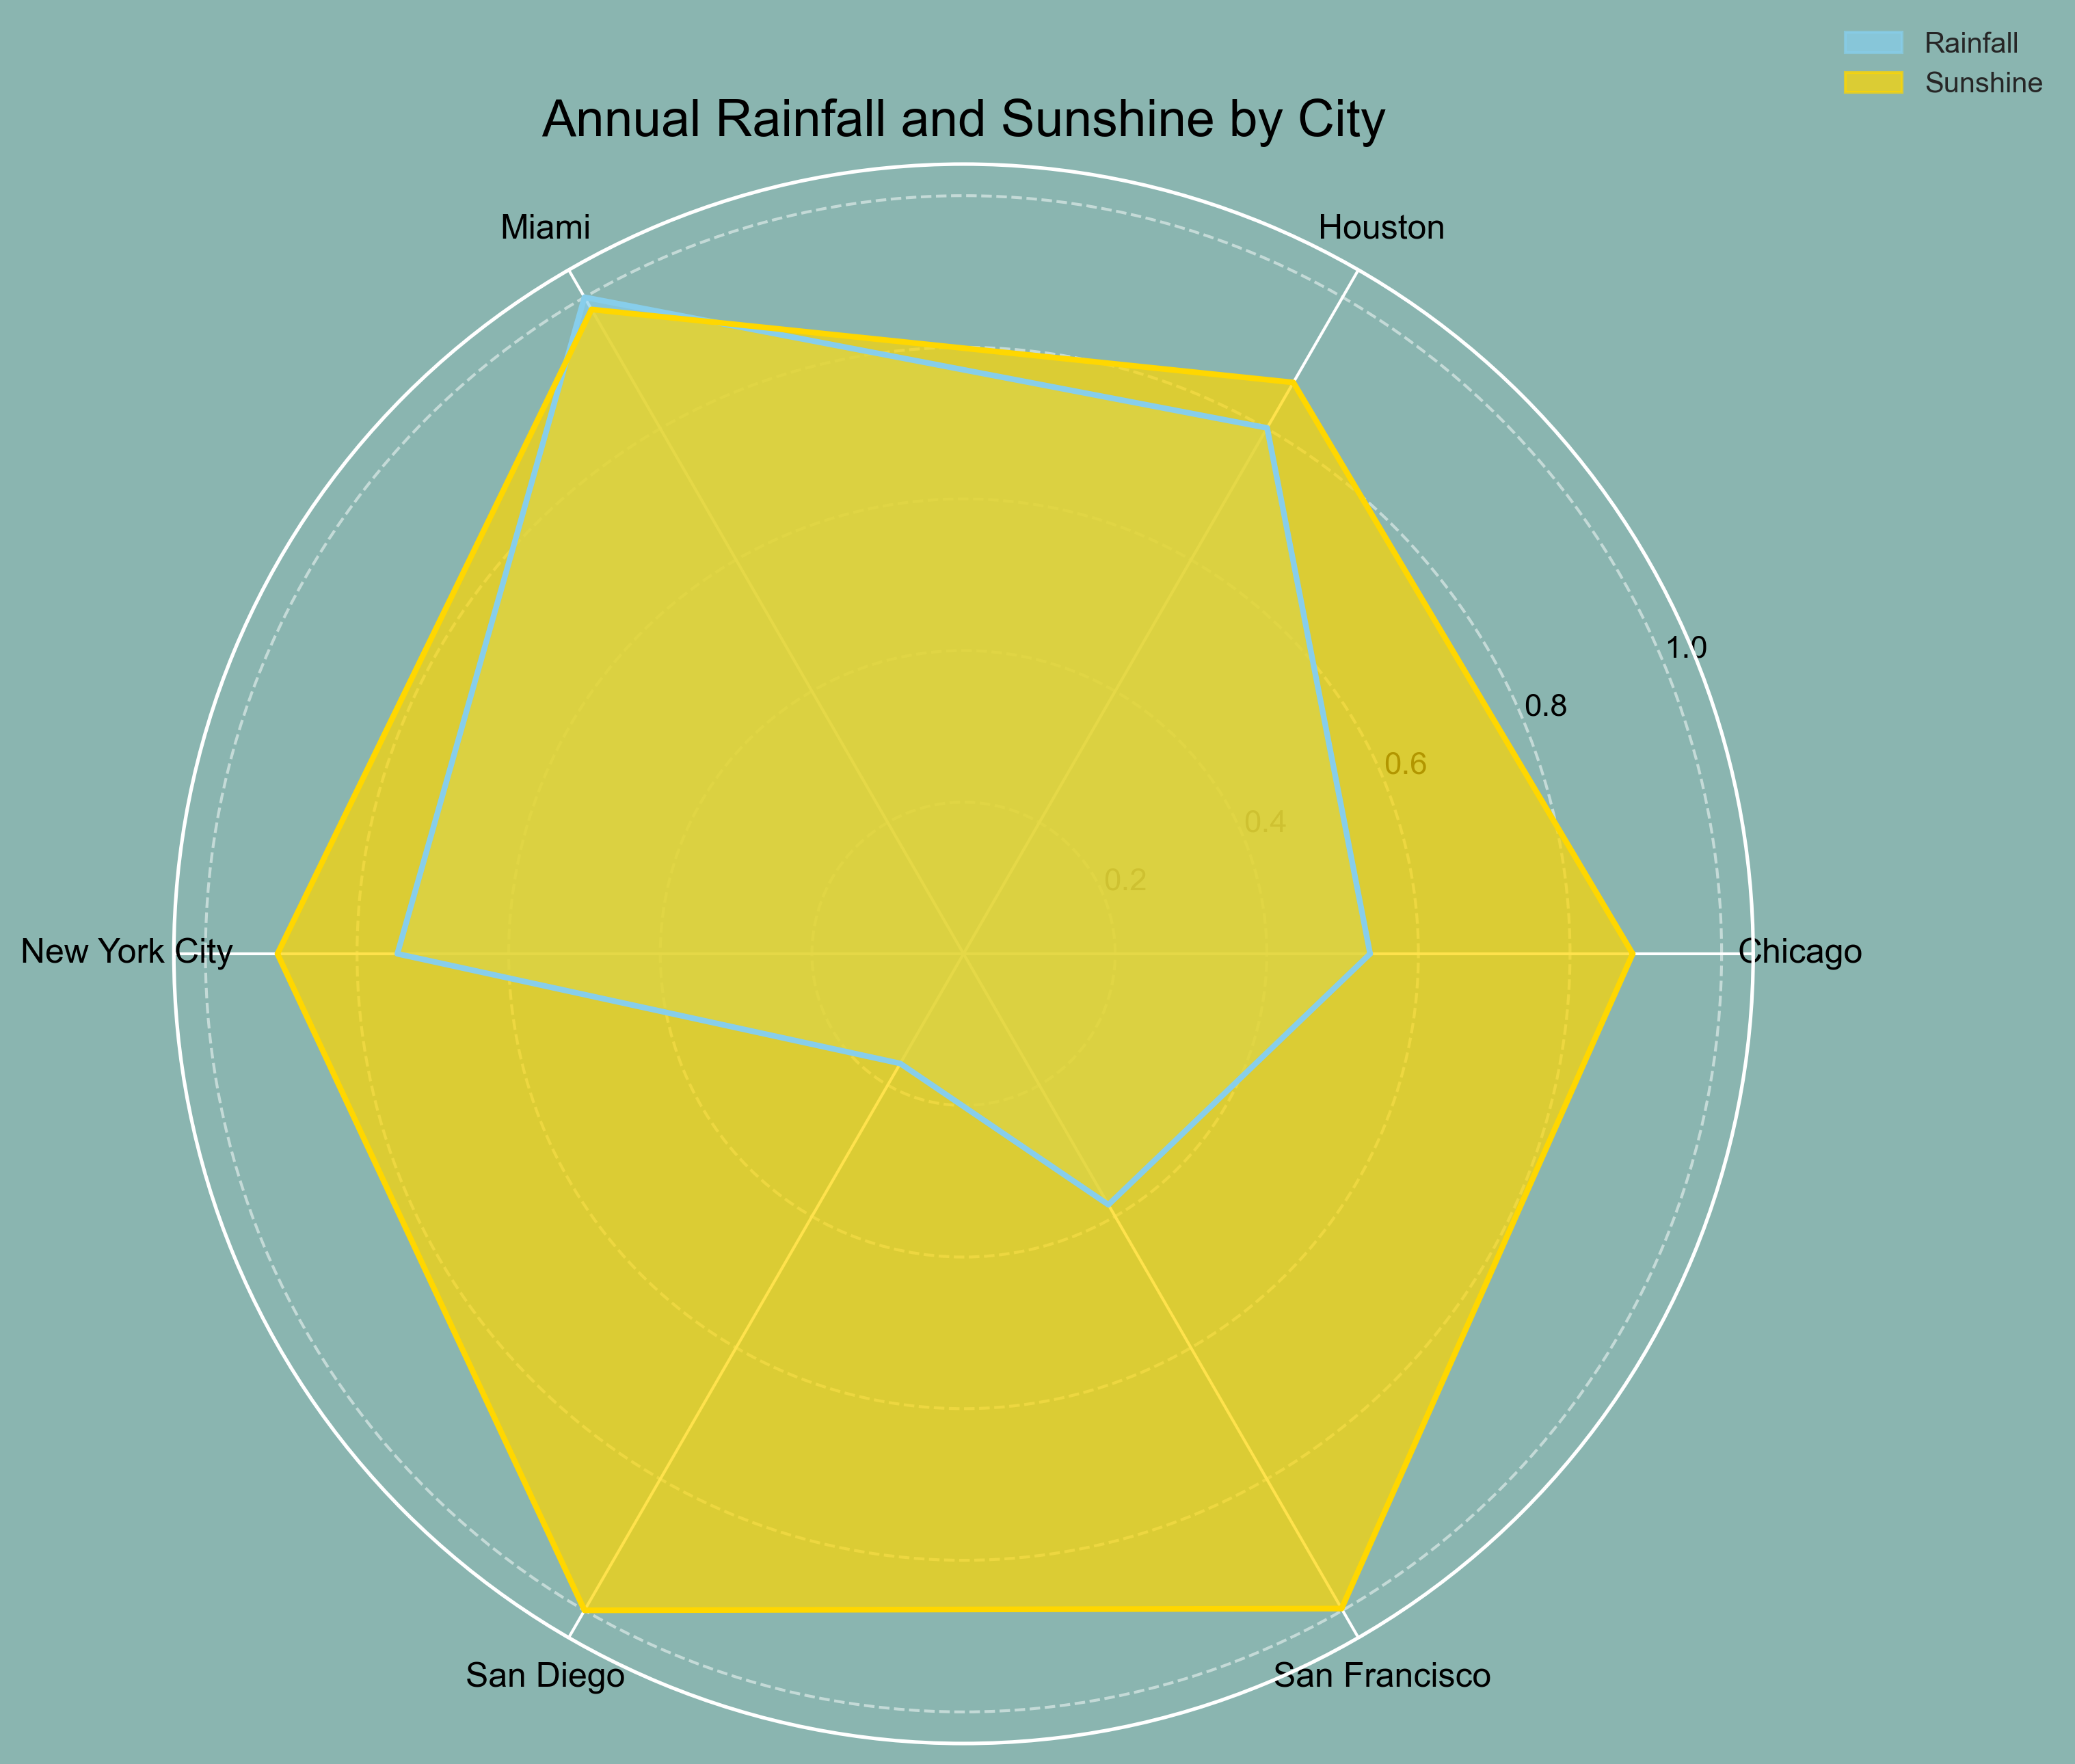

In [39]:
import numpy as np

# Preprocess data
grouped_annual = df.groupby('city').agg(
    annual_rain=('rain', 'sum'),
    annual_sunshine=('sunshine', 'sum')
).reset_index()

# Define angles for the radial chart
cities = grouped_annual['city']
angles = np.linspace(0, 2 * np.pi, len(cities), endpoint=False).tolist()

# Add the start angle to close the circle
angles += angles[:1]

# Normalize data
rain_data = grouped_annual['annual_rain'] / grouped_annual['annual_rain'].max()
sunshine_data = grouped_annual['annual_sunshine'] / grouped_annual['annual_sunshine'].max()

# Close the circle
rain_data = np.append(rain_data, rain_data[0])
sunshine_data = np.append(sunshine_data, sunshine_data[0])

# Initialize the figure
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True), dpi=300)
fig.set_facecolor("#8ab5b0")
ax.set_facecolor("#8ab5b0")

# Plot rain
ax.fill(angles, rain_data, color='skyblue', alpha=0.7, label='Rainfall')
ax.plot(angles, rain_data, color='skyblue', linewidth=2)

# Plot sunshine
ax.fill(angles, sunshine_data, color='gold', alpha=0.7, label='Sunshine')
ax.plot(angles, sunshine_data, color='gold', linewidth=2)



# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(cities, color=text_color, fontsize=12)
ax.tick_params(axis='y', colors=text_color)
ax.yaxis.grid(color='white', linestyle='dashed', alpha=0.5)

# Title and legend
ax.set_title('Annual Rainfall and Sunshine by City', fontsize=18, color=text_color, va='bottom')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=10, frameon=False)



plt.show()


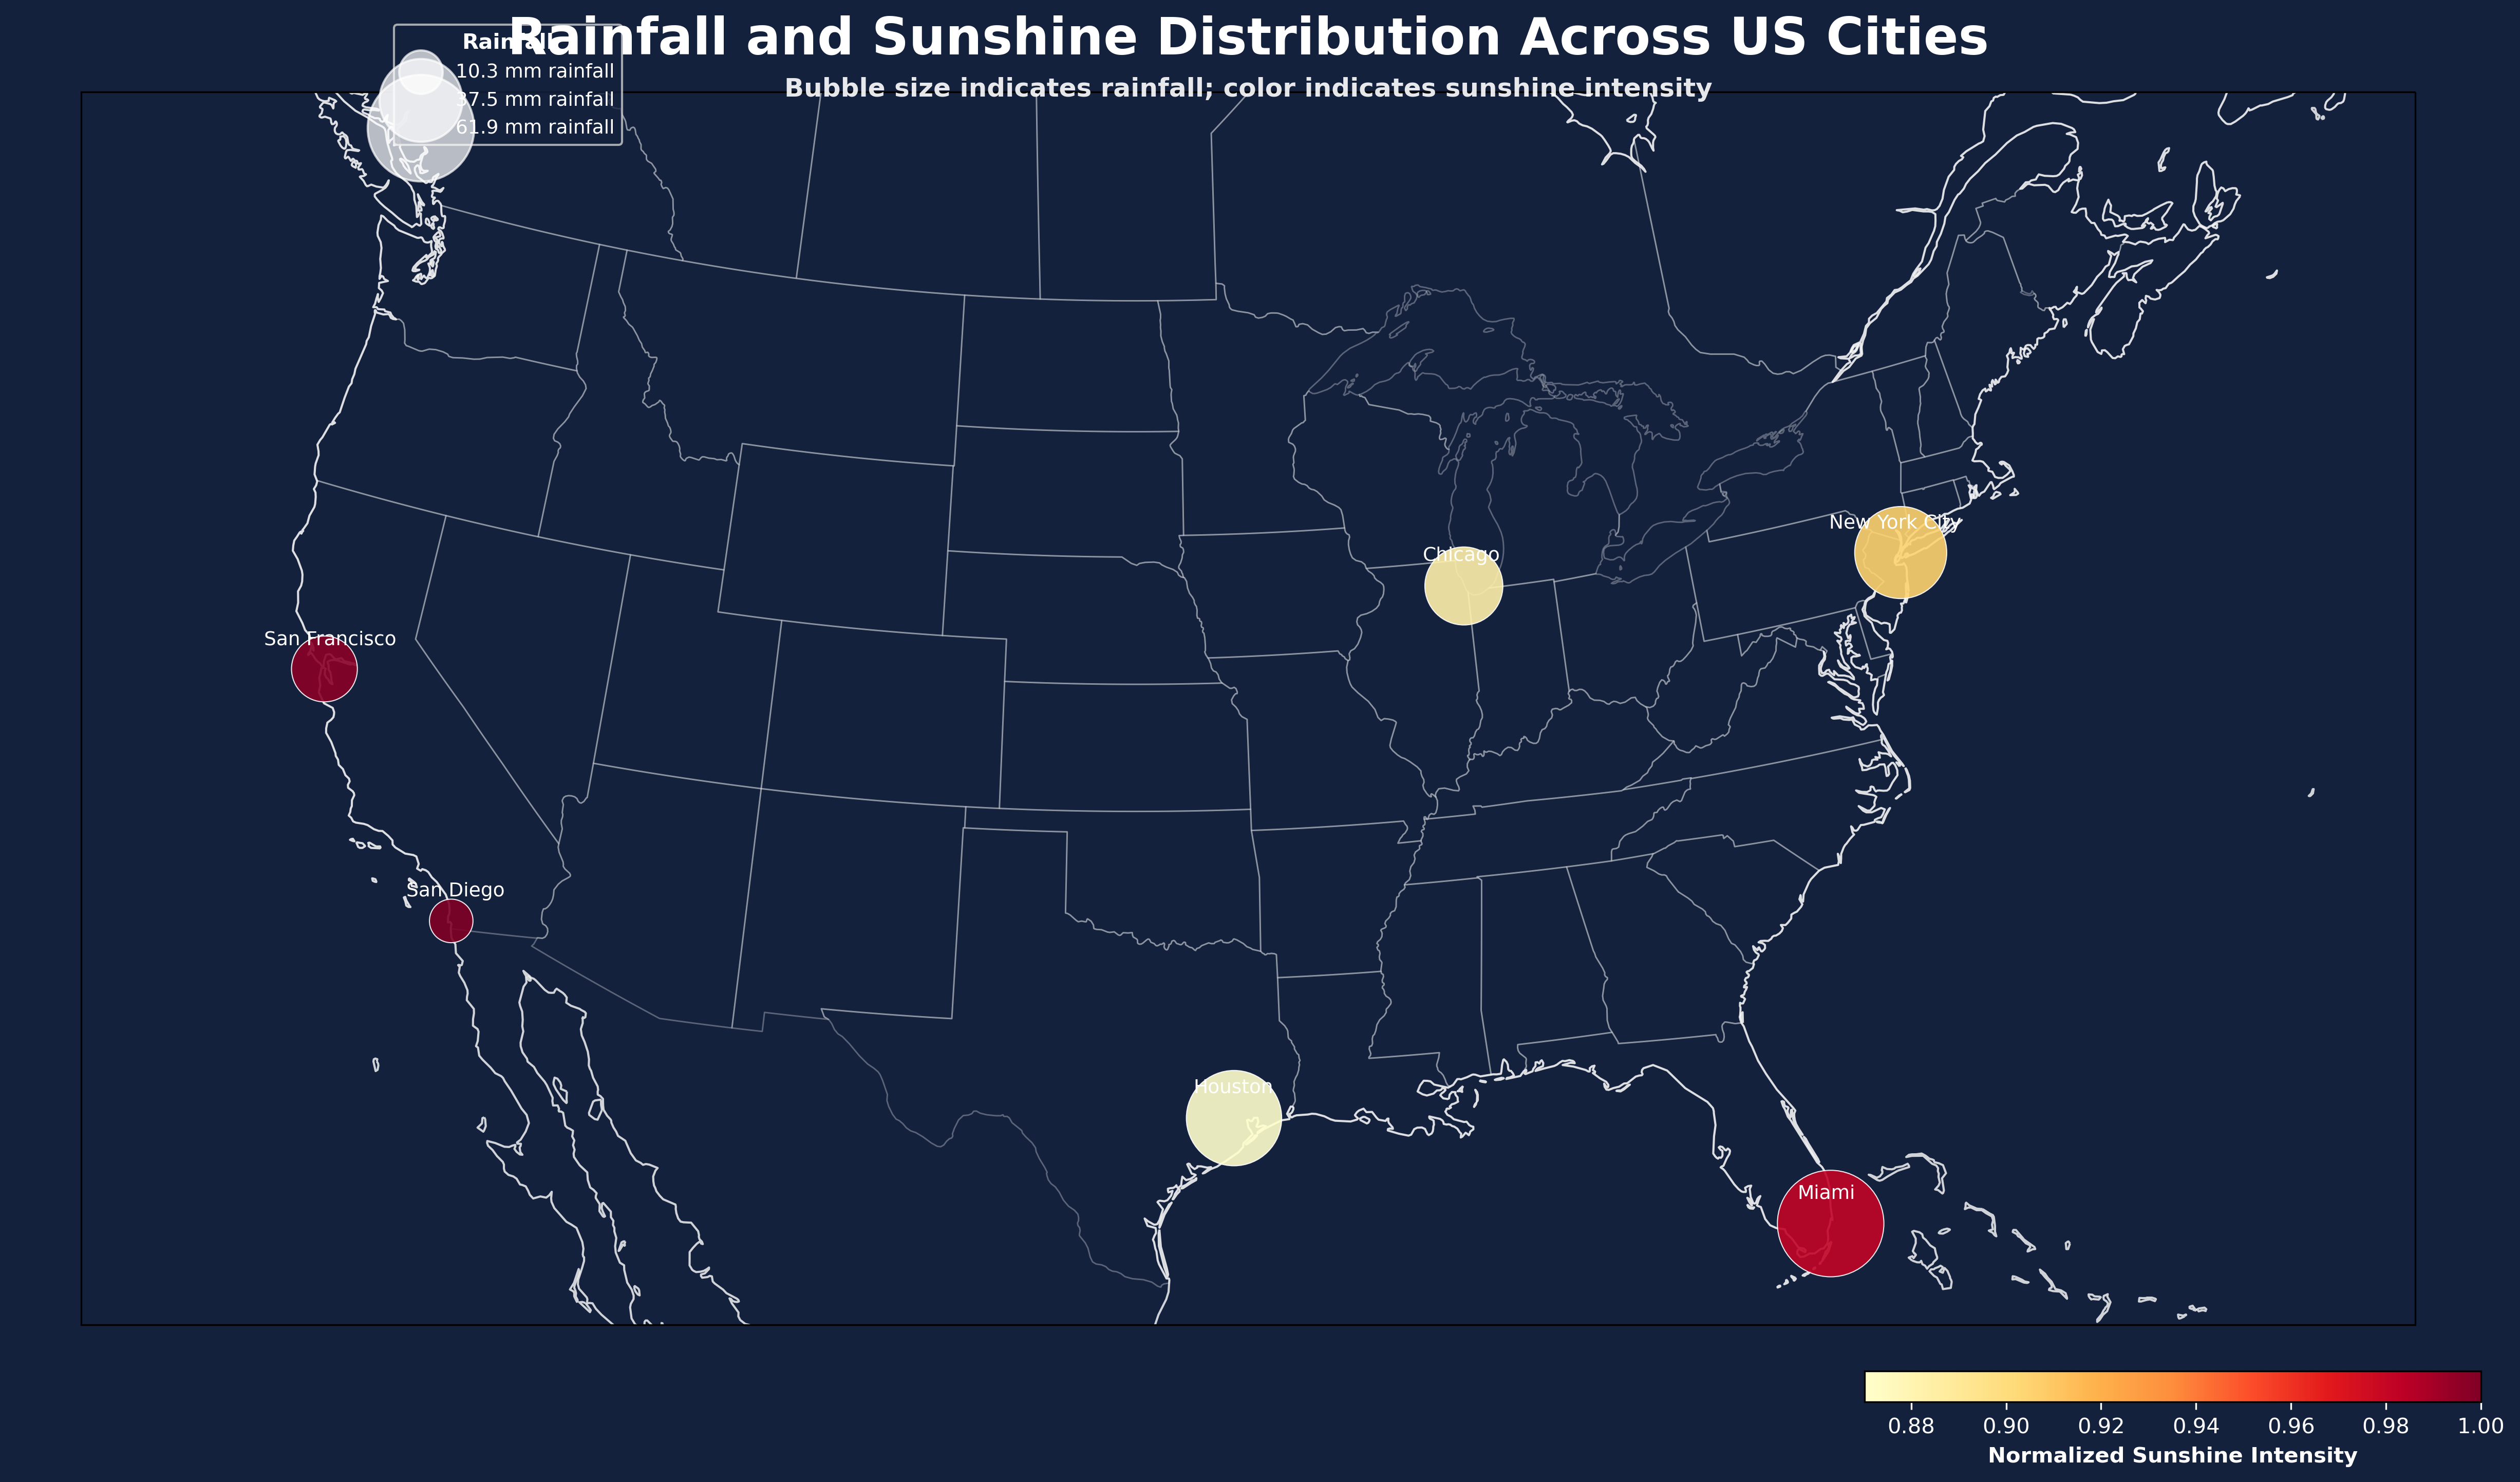

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import Normalize, LightSource
from matplotlib.cm import ScalarMappable
import numpy as np

# Colors and Fonts
background_color = '#14213d'
text_color = 'white'
alpha_text = 0.7

# Load the dataset
file_path = "weather.csv"
df = pd.read_csv(file_path)

# Aggregate data by city
grouped_df = df.groupby(['city', 'lat', 'lon']).agg(
    rain=('rain', 'sum'),
    sunshine=('sunshine', 'sum')
).reset_index()

# Normalize sunshine data for color mapping
grouped_df['sunshine_scaled'] = grouped_df['sunshine'] / grouped_df['sunshine'].max()

# Define projection
proj = ccrs.LambertConformal(central_longitude=-98, central_latitude=35)

# Initialize the figure
fig = plt.figure(figsize=(20, 10), dpi=300)
fig.set_facecolor(background_color)

# Create main map axis
ax = plt.axes([0.1, 0.1, 0.8, 0.8], projection=proj)
ax.set_facecolor(background_color)

# Set map extent for USA
ax.set_extent([-125, -65, 25, 50], crs=ccrs.PlateCarree())

# Add geographic features with enhanced visibility
ax.add_feature(cfeature.STATES.with_scale('50m'), 
               edgecolor='white',
               alpha=0.3,
               linewidth=0.7)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'),
               edgecolor='white',
               alpha=0.8,
               linewidth=1.0)

# Bubble plot on the map with enhanced visibility
scatter = ax.scatter(
    grouped_df['lon'], grouped_df['lat'],
    s=grouped_df['rain'] * 40,
    c=grouped_df['sunshine_scaled'],
    cmap='YlOrRd',
    linewidth=0.5,
    edgecolor='white',
    alpha=0.9,
    zorder=10,
    transform=ccrs.PlateCarree()
)

# Add city names
for idx, row in grouped_df.iterrows():
    ax.text(
        row['lon'], row['lat'] + 0.5,
        row['city'],
        fontsize=9,
        color=text_color,
        ha='center',
        va='bottom',
        zorder=20,
        transform=ccrs.PlateCarree()
    )

# Add colorbar for sunshine intensity
cbar_ax = fig.add_axes([0.7, 0.05, 0.2, 0.02])
norm = Normalize(vmin=grouped_df['sunshine_scaled'].min(), vmax=grouped_df['sunshine_scaled'].max())
cbar = fig.colorbar(ScalarMappable(norm=norm, cmap='YlOrRd'), 
                   cax=cbar_ax,
                   orientation='horizontal')
cbar.set_label('Normalized Sunshine Intensity', color=text_color, fontsize=10, weight='bold')
cbar.ax.xaxis.set_tick_params(color=text_color)
plt.setp(plt.getp(cbar.ax.axes, 'xticklabels'), color=text_color)

# Add rainfall legend
legend_ax = fig.add_axes([0.1, 0.85, 0.2, 0.1])
legend_ax.axis('off')
rain_values = [grouped_df['rain'].min(), grouped_df['rain'].mean(), grouped_df['rain'].max()]
for i, rain in enumerate(rain_values):
    legend_ax.scatter([], [], s=rain*40, c='white', alpha=0.7,
                     label=f'{rain:.1f} mm rainfall')
legend = legend_ax.legend(title='Rainfall', frameon=True, 
                         fontsize=9, title_fontsize=10,
                         labelcolor=text_color)
legend.get_frame().set_facecolor(background_color)
legend.get_frame().set_alpha(0.8)
plt.setp(legend.get_title(), color=text_color, weight='bold')

# Title
fig.text(
    0.5, 0.95,
    'Rainfall and Sunshine Distribution Across US Cities',
    color=text_color,
    fontsize=24,
    ha='center',
    va='top',
    weight='bold'
)

# Subtitle
fig.text(
    0.5, 0.91,
    'Bubble size indicates rainfall; color indicates sunshine intensity',
    color=text_color,
    fontsize=12,
    ha='center',
    va='top',
    alpha=0.9,
    weight='bold'
)

plt.show()


<urlopen error [Errno 8] nodename nor servname provided, or not known><urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlope

/Users/jeffersonchen/miniforge3/envs/dsc80/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


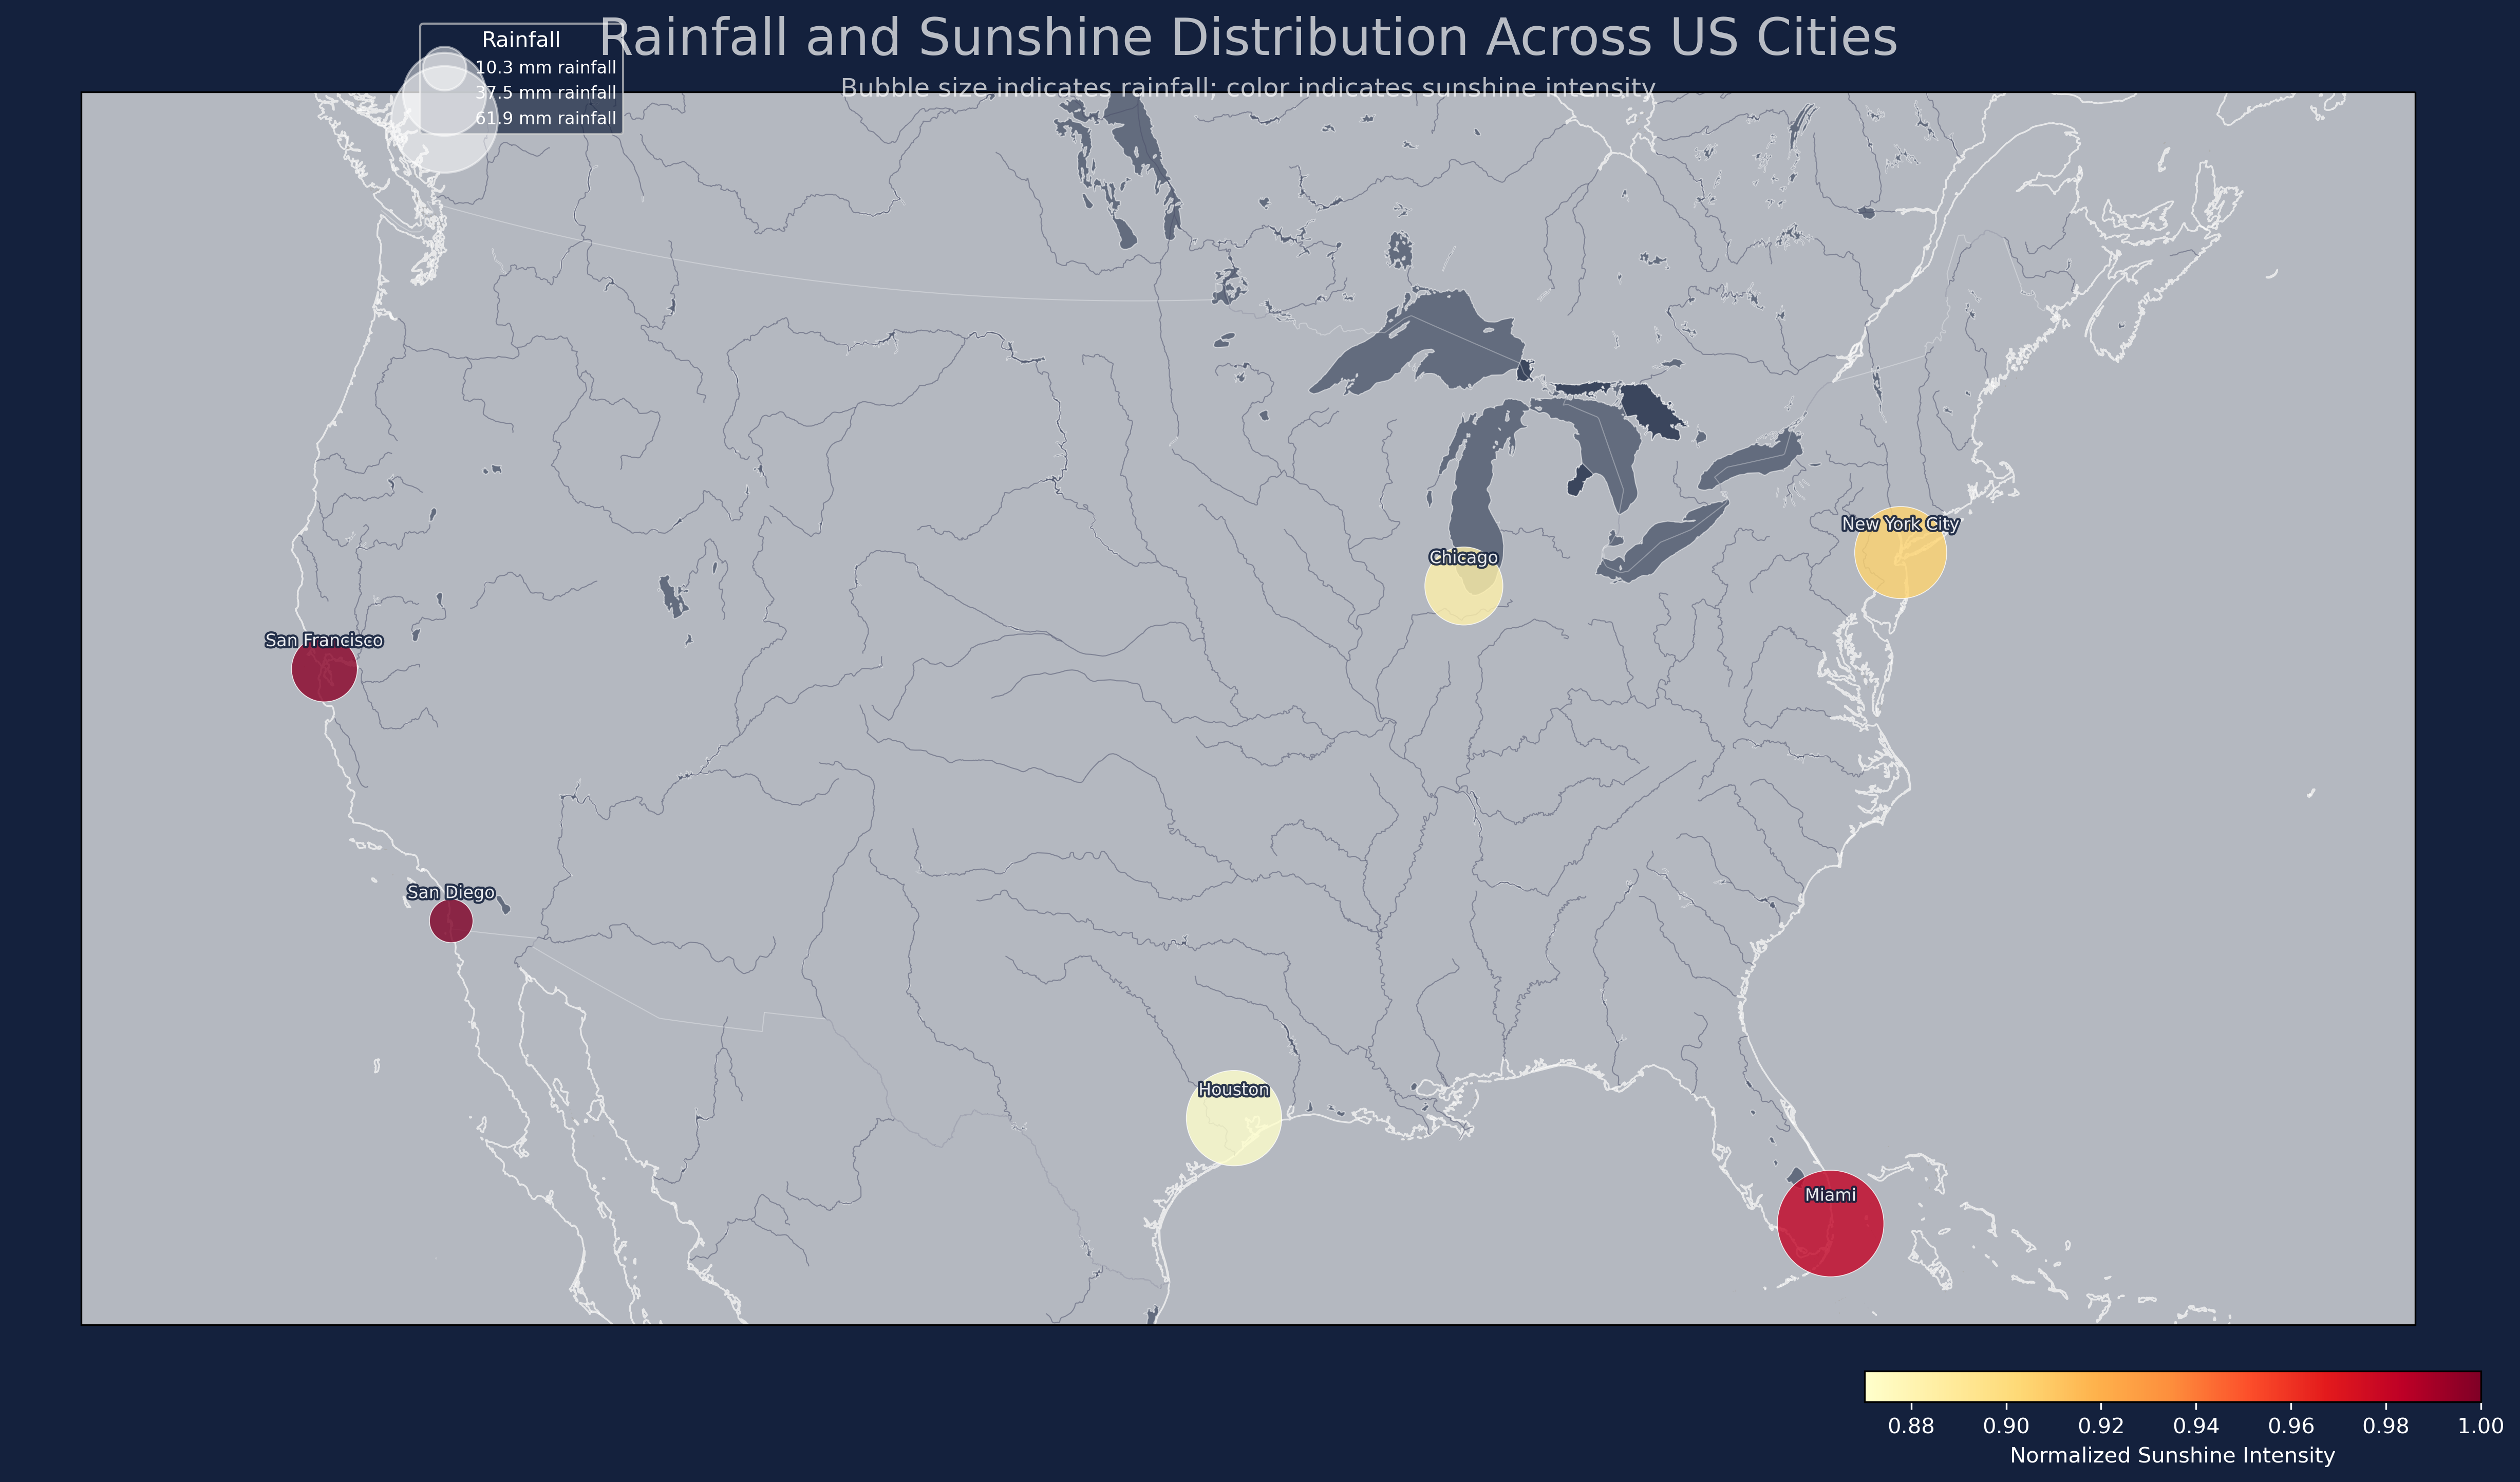

In [19]:
import cartopy.io.img_tiles as cimgt

# Define projection
proj = ccrs.LambertConformal(central_longitude=-98, central_latitude=35)

# Initialize the figure
fig = plt.figure(figsize=(20, 10), dpi=300)
fig.set_facecolor(background_color)

# Create main map axis with a high-resolution background map
tiler = cimgt.Stamen('terrain-background')
ax = plt.axes([0.1, 0.1, 0.8, 0.8], projection=proj)
ax.set_facecolor(background_color)

# Set map extent for USA
ax.set_extent([-125, -65, 25, 50], crs=ccrs.PlateCarree())

# Add high-resolution features
ax.add_feature(cfeature.LAND.with_scale('10m'), facecolor='none', edgecolor='black', linewidth=0.3)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), edgecolor='white', alpha=0.7, linewidth=0.8)
ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='#14213d', alpha=0.5, edgecolor='white', linewidth=0.5)
ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='#4a4e69', alpha=0.5, linewidth=0.5)
ax.add_feature(cfeature.BORDERS.with_scale('10m'), edgecolor='white', alpha=0.3, linewidth=0.5)

# Add terrain-background tiles for sharper geography
ax.add_image(tiler, 6, interpolation='spline36', alpha=0.7)

# Transform coordinates to the projection's CRS
pc = ccrs.PlateCarree()
new_coords = proj.transform_points(pc, grouped_df['lon'].values, grouped_df['lat'].values)

# Bubble plot on the map
scatter = ax.scatter(
    new_coords[:, 0], new_coords[:, 1],
    s=grouped_df['rain'] * 40,
    c=grouped_df['sunshine_scaled'],
    cmap='YlOrRd',
    linewidth=0.4,
    edgecolor='white',
    alpha=0.8,
    zorder=10
)

# Add city names
for idx, row in grouped_df.iterrows():
    x, y = proj.transform_point(row['lon'], row['lat'], src_crs=pc)
    ax.text(
        x, y + 50000,
        row['city'],
        fontsize=8,
        color=text_color,
        ha='center',
        va='bottom',
        zorder=20,
        alpha=0.9,
        path_effects=[
            plt.matplotlib.patheffects.withStroke(linewidth=2, foreground=background_color)
        ]
    )

# Add colorbar for sunshine intensity
cbar_ax = fig.add_axes([0.7, 0.05, 0.2, 0.02])
norm = Normalize(vmin=grouped_df['sunshine_scaled'].min(), vmax=grouped_df['sunshine_scaled'].max())
cbar = fig.colorbar(ScalarMappable(norm=norm, cmap='YlOrRd'), 
                   cax=cbar_ax,
                   orientation='horizontal')
cbar.set_label('Normalized Sunshine Intensity', color=text_color, fontsize=10)
cbar.ax.xaxis.set_tick_params(color=text_color)
plt.setp(plt.getp(cbar.ax.axes, 'xticklabels'), color=text_color)

# Add rainfall legend
legend_ax = fig.add_axes([0.1, 0.85, 0.2, 0.1])
legend_ax.axis('off')
rain_values = [grouped_df['rain'].min(), grouped_df['rain'].mean(), grouped_df['rain'].max()]
for i, rain in enumerate(rain_values):
    legend_ax.scatter([], [], s=rain*40, c='white', alpha=0.5,
                     label=f'{rain:.1f} mm rainfall')
legend = legend_ax.legend(title='Rainfall', frameon=True, 
                         fontsize=8, title_fontsize=10,
                         labelcolor=text_color)
legend.get_frame().set_facecolor(background_color)
legend.get_frame().set_alpha(0.7)
plt.setp(legend.get_title(), color=text_color)

# Title
fig.text(
    0.5, 0.95,
    'Rainfall and Sunshine Distribution Across US Cities',
    color=text_color,
    fontsize=24,
    ha='center',
    va='top',
    alpha=alpha_text
)

# Subtitle
fig.text(
    0.5, 0.91,
    'Bubble size indicates rainfall; color indicates sunshine intensity',
    color=text_color,
    fontsize=12,
    ha='center',
    va='top',
    alpha=alpha_text
)

plt.show()